In [1]:
from __future__ import print_function
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

from yellowbrick.classifier import ConfusionMatrix, DiscriminationThreshold, PrecisionRecallCurve, ClassificationReport, ClassPredictionError, ROCAUC
from yellowbrick.regressor import PredictionError, AlphaSelection, RegressionScoreVisualizer 
from yellowbrick.target import ClassBalance
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sn

c:\users\skennedy\.virtualenvs\lab_1-nbrg4xbo\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
ds = load_diabetes()

# this holds the continuous feature data
# because ds.data is a matrix, there are some special properties we can access (like 'shape')
print('features shape:', ds.data.shape, 'format is:', ('rows','columns')) # there are 442 instances and 10 features per instance
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (442, 10) format is: ('rows', 'columns')
range of target: 25.0 346.0


In [3]:
data_set = pd.DataFrame(ds.data)
data_set['ones'] = 1
data_set['target'] = pd.Series(ds.target)

In [4]:
w = np.dot(np.dot(data_set[data_set.columns[0:10]].T
                  , data_set['target']), np.linalg.inv(np.dot(data_set[range(0, 10)].T, data_set[range(0, 10)])))
w

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
0         442 non-null float64
1         442 non-null float64
2         442 non-null float64
3         442 non-null float64
4         442 non-null float64
5         442 non-null float64
6         442 non-null float64
7         442 non-null float64
8         442 non-null float64
9         442 non-null float64
ones      442 non-null int64
target    442 non-null float64
dtypes: float64(11), int64(1)
memory usage: 41.6 KB


In [6]:
reg = LinearRegression()
reg.fit(ds.data, ds.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Put weights into data frame

In [7]:
weights = pd.DataFrame(reg.coef_)
weights.rename(columns={0: 'weight'}, inplace=True)
intercept = reg.intercept_
print(intercept)

152.1334841628965


### Make predictions with numpy

In [8]:
predictions_numpy = np.dot(weights['weight'].T, data_set[range(0, 10)].T)
predictions_numpy = predictions_numpy + intercept

### Calculate mean squared error

In [9]:
np.square(ds.target - predictions_numpy).sum()/(len(ds.target))

2859.6903987680657

### Using sk-learn

In [10]:
mean_squared_error(predictions, data_set['target'])

NameError: name 'predictions' is not defined

### Predict with sk-learn

In [11]:
predictions = reg.predict(data_set[range(0, 10)])

In [12]:
mean_squared_error(predictions_numpy.T, np.array(data_set['target'].values))

2859.6903987680657

In [13]:
mean_squared_error(predictions, np.array(data_set['target'].values))

2859.6903987680657

In [14]:
from sklearn.datasets import load_iris
import numpy as np

# this will overwrite the diabetes dataset
ds = load_iris()
print('features shape:', ds.data.shape) # there are 150 instances and 4 features per instance
print('original number of classes:', len(np.unique(ds.target)))

# now let's make this a binary classification task
ds.target = ds.target>1
print ('new number of classes:', len(np.unique(ds.target)))


features shape: (150, 4)
original number of classes: 3
new number of classes: 2


In [15]:
iris_data = pd.DataFrame(ds.data)
iris_data['ones'] = 1
iris_data['target'] = ds.target

In [16]:
#predicted_probs['NewPredict'] = predicted_probs['ProbTrue'].apply(lambda x: 1 if x >= cutoff else 0)
iris_data['target'] = iris_data['target'].apply(lambda x: 1 if x else 0)

In [17]:
w = np.dot(np.dot(iris_data[iris_data.columns[:-1]].T
                  , iris_data['target']), np.linalg.inv(np.dot(iris_data[iris_data.columns[:-1]].T, iris_data[iris_data.columns[:-1]])))
w

array([-0.04587608,  0.20276839,  0.00398791,  0.55177932, -0.69528186])

In [18]:
reg_log = LinearRegression().fit(iris_data[range(0, 4)], iris_data['target'])
print(reg_log.coef_, reg_log.intercept_)

[-0.04587608  0.20276839  0.00398791  0.55177932] -0.6952818633256024


In [61]:
predictions = pd.DataFrame(reg_log.predict(iris_data[range(0, 4)]))
predictions.min()[0],  predictions.max()[0]

(0   -0.264639
 dtype: float64, 0    1.108151
 dtype: float64)

In [63]:
alphas = np.linspace(predictions.min()[0]-0.01, predictions.max()[0] + 0.01, 10000)

0.510973223774553


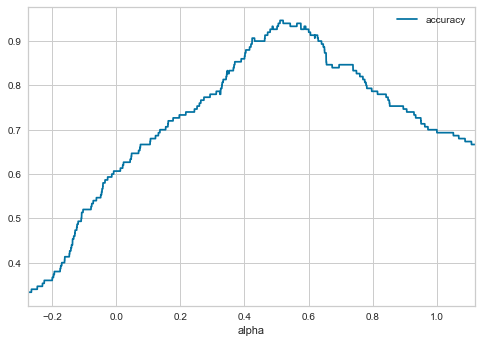

In [64]:
discrimination_thresholds = []
for a in alphas:
    predictions['mapped'] = predictions[0].apply(lambda x: 1 if x >= a else 0)
    discrimination_thresholds.append({'alpha':a,
                                       'accuracy':accuracy_score(predictions['mapped'] , iris_data['target'])})

df = pd.DataFrame(discrimination_thresholds)
df.plot(kind='line', x='alpha', y='accuracy')
max_alpha = df.iloc[df.accuracy.argmax()]['alpha']
print(max_alpha)

In [51]:
iris_data[iris_data.target == 1].shape[0]/iris_data.shape[0]

0.3333333333333333

In [65]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, optional (default=True)
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    

In [36]:
lgrg.predict(iris_data[range(0, 4)])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)